In [76]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



[]

In [77]:
d_p = 80
d_V = 80
epochs = 100


In [78]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(d_p,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(d_V, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(d_p, activation='relu'),
])

In [79]:
folder_path = "data/test_data/example_data/heat2d/"

In [80]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

2025-03-17 01:01:35,017 - sciml.model.deeponet.deeponet - INFO - Model initialized with 100 epochs, 32 batch size, 0.001 learning rate


In [81]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 4853.68it/s]


In [82]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 80)
(40, 8000, 3)
(40, 8000)


In [83]:
loss_history_train,loss_history_test = model.fit()

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 5980.12it/s]
2025-03-17 01:01:35.462279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [40,8000]
	 [[{{node Placeholder/_2}}]]
Training progress:   0%|          | 0/100 [00:00<?, ?it/s]2025-03-17 01:01:35.484360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [32,8000]
	 [[{{node Placeholder/_2}}]]
2025-03-17 01:01:36.404590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore 

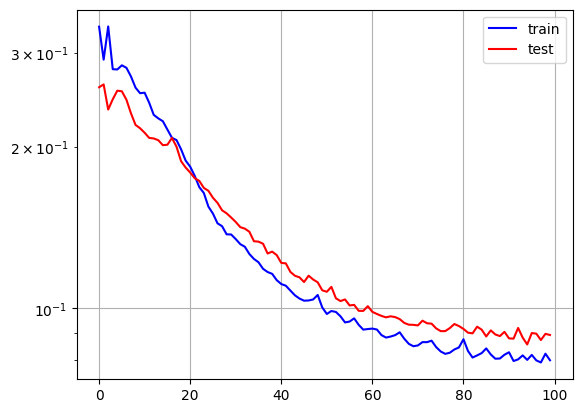

In [84]:
plt.plot(loss_history_train,color='blue')
plt.plot(loss_history_test,color='red')
plt.legend(['train','test'])
#log 
plt.yscale('log')
plt.grid()
plt.show()